In [1]:
clc
clear all

In [39]:
%%file load_dcm.m
function [img] = load_dcm(name, varargin)
    %{
    loads dcm file
    
    :param name:     the name of the file
    :param varargin: the other arguments. valid arguments are:-
                        1) resize: a list containing new size
                        
    :return:         the image
    %}
    defaults = {false};
    idx = ~cellfun('isempty', varargin);
    defaults(idx) = varargin(idx);
    
    img = dicomread(strcat('../../res/images/', name));
    if defaults{1} ~= 0
       img = imresize(img, defaults{1}); 
    end
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/load_dcm.m'.


In [82]:
%%file load_image.m
function [img] = load_image(name, varargin)
    %{
    loads dcm file
    
    :param name:     the name of the file
    :param varargin: the other arguments. valid arguments are:-
                        1) resize: a list containing new size
                        
    :return:         the image
    %}
    defaults = {false};
    idx = ~cellfun('isempty', varargin);
    defaults(idx) = varargin(idx);
    
    img = imread(strcat('../../res/images/', name));
    if defaults{1} ~= 0
       img = imresize(img, defaults{1}); 
    end
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/load_image.m'.


In [54]:
%%file high_pass_filter.m
function [Iout] = high_pass_filter(img, sigma)
    M = 2*size(img,1) + 1;
    N = 2*size(img,2) + 1;
    [X, Y] = meshgrid(1:N,1:M);
    centerX = ceil(N/2);
    centerY = ceil(M/2);
    
    % gaussian low pass filter
    gaussianNumerator = (X - centerX).^2 + (Y - centerY).^2;
    H = exp(-gaussianNumerator./(2*sigma.^2));

    H = 1 - H; % converting to high pass filter
    alpha = 0.5;
    beta = 1.5;
    Hemphasis = alpha + beta*H; % high frequency emphasis filter

    % shift zero-frequency component to center (useful for visualizing a 
    % Fourier transform with the zero-frequency component in the middle of the spectrum.)
    % (in other words, shift the filter to the center)
    Hemphasis = fftshift(Hemphasis);

    If = fft2(img, M, N); % convert image to frequency domain. applying padding of MxN before conversion.
    Iout = real(ifft2(Hemphasis.*If)); % apply filter to If and apply inverse fourier transform 
    Iout = Iout(1:size(img,1),1:size(img,2)); % crop image (cuz it was padded)
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/high_pass_filter.m'.


In [58]:
%%file homomorphic_filter.m
function [Ihmf] = homomorphic_filter(img, sigma)
    img = im2double(img);
    imgLog = log(1 + img);
    Iout = high_pass_filter(imgLog, sigma);
    Ihmf = exp(Iout) - 1;
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/homomorphic_filter.m'.


In [62]:
%%file tophat_transform.m
function [thf] = tophat_transform(img, se_type, se_size)
    se = strel(se_type, se_size);
    thf = imtophat(img, se);
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/tophat_transform.m'.


In [63]:
%%file bothat_transform.m
function [bhf] = bothat_transform(img, se_type, se_size)
    se = strel(se_type, se_size);
    bhf = imbothat(img, se);
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/bothat_transform.m'.


In [96]:
%%file CLAHE.m
function [HE] = CLAHE(img)
    HE = adapthisteq(img, 'clipLimit', 0.00002);
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/CLAHE.m'.


In [17]:
%%file apply_filters.m
function [out] = apply_filters(img, img_name)
    fprintf("applying homomorphic filter...");
    Ihmf = homomorphic_filter(img, 10);
    fprintf("\napplying tophat transform...");
    tophat = tophat_transform(Ihmf, 'disk', 15);
    fprintf("\napplying bothat transform...");
    bothat = bothat_transform(Ihmf, 'disk', 15);
    fprintf("\napplying CLAHE...");
    out = CLAHE((Ihmf + tophat) - bothat);
    fprintf("\ndone.");
    
    %path="../../res/images/output/";
    %imwrite(Ihmf, strcat(path, img_name, "-MATLABHomomorphicFilter.jpg"))
    %imwrite(tophat, strcat(path, img_name,"-MATLABtophat.jpg"))
    %imwrite(bothat, strcat(path, img_name,"-MATLABbothat.jpg"))
    %imwrite(out, strcat(path, img_name,"-MATLABfinal.jpg"))
    
    montage([Ihmf, tophat; bothat, out]);
end

Created file '/home/ouroboros/Projects/IC2/src/notebooks/apply_filters.m'.


applying homomorphic filter...
applying tophat transform...
applying bothat transform...
applying CLAHE...
done.

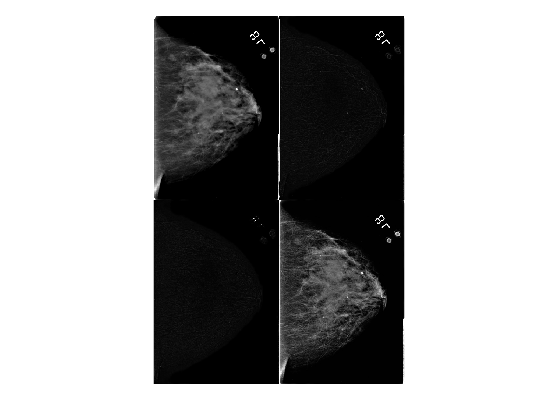

In [15]:
img = load_dcm("000000.dcm");
apply_filters(img, "000000");

applying homomorphic filter...
applying tophat transform...
applying bothat transform...
applying CLAHE...
done.

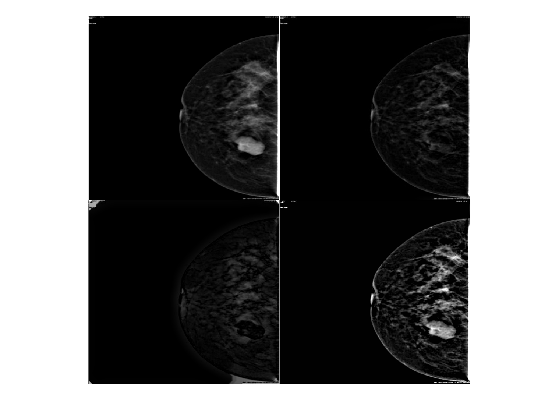

In [16]:
img = rgb2gray(load_image("test.jpg"));
apply_filters(img, "test");